# HW 5: Boundary Value Problems

In this HW you will, using chatGPT's help as you deem useful, derive, implement, and test numerical solutions to a new boundary value problem (BVP):

$$
\frac{d^2u}{dx^2}(x) + p(x)\frac{du}{dx}(x) + q(x) u(x) = f(x), \quad x\in (a,b) \\
u(x=a) = u_a, \\
u(x=b) = u_b.
$$

In this BVP, $p(x)$ and $q(x)$ are provided functions. Also, $u_a$ and $u_b$ are given, as in the lecture notes (i.e., the BVP solution is prescribed with *Dirichlet boundary conditions*).

You will solve variants of this BVP using a finite difference (FD) and spectral method approach.

Use Chat GPT to create the Jupyter notebook sketched out by the prompts in this HW statement. Submit your filled-in jupyter notebook as an .ipynb file, making sure to provide your chat GPT transcript in that same file!

# ChatGPT Transcript: [https://chatgpt.com/share/6801d1f9-a754-8011-89b9-5fdd50bfa8d4](https://chatgpt.com/share/6801d1f9-a754-8011-89b9-5fdd50bfa8d4)

# Section 1: Specify the BVP (20 points)

For the case when $u_a=u_b=0$, select and clarify your choice for $a,$ $b$, $p(x)$, $q(x)$. Be sure you choose set of parameters that is distinct from the problem we studied in class (i.e., $p(x)=q(x)≡0$), and that still leads to a known analytical solution that you can compare your numerical solution against. (You can use chatGPT to help you think of values for these variables that induce analytical solutions and lead to meaningful equations that are historically important or relevant to specific physical applications!).

## **1.1** Boundary Value Problem (BVP) Setup

We consider the second-order linear boundary value problem:

$$
\frac{d^2u}{dx^2}(x) + p(x)\frac{du}{dx}(x) + q(x) u(x) = f(x), \quad x\in (a,b)
$$
with Dirichlet boundary conditions:
$$
u(x=a) = u_a = 0, \quad u(x=b) = u_b = 0.
$$

### Choice of Functions and Domain

To ensure a nontrivial case that is distinct from the problem studied in class ($p(x) = q(x) \equiv 0$), we select the following:

- $ a = 0 $
- $ b = 1 $
- $ p(x) = -2 $
- $ q(x) = 2 $

We choose these such that we can obtain an analytical solution for comparison.

---

## **1.2** Analytical Solution

Let the exact solution be:
$$
u(x) = x(1 - x) e^x
$$

This function satisfies the boundary conditions:
- $ u(0) = 0(1 - 0)e^0 = 0 $
- $ u(1) = 1(1 - 1)e^1 = 0 $

To compute the right-hand side $ f(x) $, we differentiate $ u(x) $:

$$
u'(x) = \frac{d}{dx} [x(1 - x) e^x] = (1 - 2x)e^x + x(1 - x)e^x
$$
$$
= [(1 - 2x) + x(1 - x)] e^x
= [1 - 2x + x - x^2] e^x = (1 - x - x^2)e^x
$$

$$
u''(x) = \frac{d}{dx} [(1 - x - x^2)e^x] 
= (-1 - 2x)e^x + (1 - x - x^2)e^x 
= [-1 - 2x + 1 - x - x^2]e^x 
= (-3x - x^2)e^x
$$

Now substitute into the differential equation:
$$
\frac{d^2u}{dx^2} + p(x)\frac{du}{dx} + q(x)u = f(x)
$$
$$
f(x) = (-3x - x^2)e^x + (-2)(1 - x - x^2)e^x + 2x(1 - x)e^x
$$

So the final expression for $ f(x) $ is:

$$
f(x) = \left[ (-3x - x^2) + (-2)(1 - x - x^2) + 2x(1 - x) \right] e^x
$$

You can simplify the expression in code when implementing.

---

## **1.3** Summary

**Domain:**
- $ x \in [0, 1] $

**Parameters:**
- $ p(x) = -2 $
- $ q(x) = 2 $
- $ u_a = 0, \quad u_b = 0 $

**Analytical Solution:**
- $ u(x) = x(1 - x)e^x $

**Right-hand side $ f(x) $:**
- Computed via symbolic or automatic differentiation as needed during implementation.


# Section 2: Finite difference solution (40 points total)

## 2a: Derive the FD equations (20 points)

Use the same approach in class to derive the matrix system of equations for obtaining a *centered, 2nd order* FD solution to the provided BVP. Note that there are a number of distinct approaches for deriving the finite difference equations. *To demonstrate your class understanding, you should be sure your derivation follows the approach from class*: "discretize" the domain into a finite number of points, write your FD solution as a linear combination of the appropriately chosen Lagrange basis functions (locally defined about each point), plug this expression into the BVP, and pursue the requisite steps to arrive at a matrix system of the form $\boldsymbol{Au} = \boldsymbol{f}$. Be sure the entries in $\boldsymbol{A},$ $\boldsymbol{u}$, and $\boldsymbol{f}$ are clearly stated. You don't need to plug in specific functions for $p(x)$ or $q(x)$, or specific values for $u_a$, $u_b$. Leave those as generic variables in your answer.


## **2a.1** Finite Difference (FD) Derivation using Lagrange Basis Functions

We begin by discretizing the domain $ [a, b] $ into $ N+2 $ equally spaced grid points:

$$
x_0 = a, \quad x_1, \quad x_2, \ldots, \quad x_{N}, \quad x_{N+1} = b,
$$
with uniform grid spacing $ h = \frac{b - a}{N+1} $. The unknowns are $ u_1, u_2, \ldots, u_N $, representing the solution at the interior points.

The boundary conditions are:
$$
u_0 = u_a, \quad u_{N+1} = u_b
$$

---

### Step 1: Constructing Local Lagrange Basis

We approximate the solution $ u(x) $ locally using a quadratic Lagrange interpolant over three points $ x_{i-1}, x_i, x_{i+1} $. The interpolant is expressed as:

$$
u(x) \approx u_{i-1} \ell_{i-1}(x) + u_i \ell_i(x) + u_{i+1} \ell_{i+1}(x)
$$

where $ \ell_j(x) $ are the Lagrange basis polynomials defined by:

$$
\ell_j(x) = \prod_{\substack{k=i-1 \\ k\neq j}}^{i+1} \frac{x - x_k}{x_j - x_k}
$$

Since the grid is uniform, the expressions for derivatives at $ x = x_i $ using this interpolation simplify to the standard centered finite difference formulas:

- First derivative (at node $ x_i $):

$$
\left. \frac{du}{dx} \right|_{x_i} \approx \frac{u_{i+1} - u_{i-1}}{2h}
$$

- Second derivative (at node $ x_i $):

$$
\left. \frac{d^2u}{dx^2} \right|_{x_i} \approx \frac{u_{i-1} - 2u_i + u_{i+1}}{h^2}
$$

---

### Step 2: Substitution into the Differential Equation

Recall the differential equation:

$$
\frac{d^2u}{dx^2}(x_i) + p(x_i)\frac{du}{dx}(x_i) + q(x_i) u(x_i) = f(x_i)
$$

Substitute the finite difference approximations:

$$
\frac{u_{i-1} - 2u_i + u_{i+1}}{h^2} + p(x_i) \cdot \frac{u_{i+1} - u_{i-1}}{2h} + q(x_i) u_i = f(x_i)
$$

Multiply through by $ h^2 $ to simplify:

$$
u_{i-1} - 2u_i + u_{i+1} + \frac{h}{2} p(x_i)(u_{i+1} - u_{i-1}) + h^2 q(x_i) u_i = h^2 f(x_i)
$$

Rewriting in a standard linear system form:

$$
\left[ 1 - \frac{h}{2}p(x_i) \right] u_{i-1}
+ \left[ -2 + h^2 q(x_i) \right] u_i
+ \left[ 1 + \frac{h}{2}p(x_i) \right] u_{i+1}
= h^2 f(x_i)
$$

---

### Step 3: Matrix System

Let $ \mathbf{u} = [u_1, u_2, \ldots, u_N]^T $ be the vector of unknowns.

Define the matrix $ \mathbf{A} \in \mathbb{R}^{N \times N} $, where each row corresponds to the FD equation at an interior node $ x_i $, $ i = 1, \ldots, N $. The entries of $ \mathbf{A} $ are:

- Subdiagonal (entry $ A_{i, i-1} $): $ 1 - \frac{h}{2} p(x_i) $, for $ i = 2, \ldots, N $
- Diagonal (entry $ A_{i, i} $): $ -2 + h^2 q(x_i) $
- Superdiagonal (entry $ A_{i, i+1} $): $ 1 + \frac{h}{2} p(x_i) $, for $ i = 1, \ldots, N-1 $

Define the right-hand side vector $ \mathbf{f} \in \mathbb{R}^{N} $ as:

$$
f_i = h^2 f(x_i)
$$

If boundary values $ u_0 = u_a $ and $ u_{N+1} = u_b $ are nonzero, they are incorporated into $ \mathbf{f} $ as:

- For $ i = 1 $:

$$
f_1 = h^2 f(x_1) - \left(1 - \frac{h}{2}p(x_1)\right) u_a
$$

- For $ i = N $:

$$
f_N = h^2 f(x_N) - \left(1 + \frac{h}{2}p(x_N)\right) u_b
$$

---

## **2a.2** Final Matrix System

$$
\mathbf{A} \mathbf{u} = \mathbf{f}
$$

This matrix system can then be solved using any suitable linear solver to obtain the numerical solution at the interior points of the domain.


## 2b: Compute the FD solution (20 points)

For your specific choice of BVP, perform the following...

### Generate and plot the FD solution

Create code that will compute the FD solution for various values of $n$ (i.e., the number of points used to discretize your domain). Also create code that will plot the true and numerical solution at four different values of $n$, chosen so that the error is visually apparent for the smallest $n$ and visually very small for the highest $n$.


## **2b.1** Finite Difference Solution and Comparison with Analytical Solution

We now implement the finite difference (FD) solver for our specific boundary value problem:

$$
\frac{d^2u}{dx^2} - 2\frac{du}{dx} + 2u = f(x), \quad x \in (0, 1)
$$
with boundary conditions:
$$
u(0) = 0, \quad u(1) = 0
$$

The exact solution is:
$$
u(x) = x(1 - x)e^x
$$

The source term $ f(x) $ is computed symbolically using derivatives of the exact solution.

We now create Python code to compute and compare the FD and true solutions for various values of $ n $, the number of **interior** grid points.

---

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Exact solution and its derivatives
def u_exact(x):
    return x * (1 - x) * np.exp(x)

def f_rhs(x):
    # Evaluate the expression derived earlier for f(x)
    return ((-3*x - x**2) + (-2)*(1 - x - x**2) + 2*x*(1 - x)) * np.exp(x)

# Finite difference solver
def fd_solver(n):
    a, b = 0, 1
    ua, ub = 0, 0
    h = (b - a) / (n + 1)
    x = np.linspace(a, b, n + 2)
    xi = x[1:-1]  # interior points

    # Coefficients
    p = -2
    q = 2

    # Construct A matrix and f vector
    main_diag = (-2 + h**2 * q) * np.ones(n)
    upper_diag = (1 + (h * p) / 2) * np.ones(n - 1)
    lower_diag = (1 - (h * p) / 2) * np.ones(n - 1)

    A = np.diag(main_diag) + np.diag(upper_diag, k=1) + np.diag(lower_diag, k=-1)

    f = h**2 * f_rhs(xi)

    # Adjust for boundary conditions (both u_a and u_b = 0, so no change needed)
    u_inner = np.linalg.solve(A, f)

    # Add boundary values
    u_full = np.zeros(n + 2)
    u_full[1:-1] = u_inner
    return x, u_full

## **2b.2** Create functions

To simplify the plotting, creating some resualble functions is necessary.
- ```u_exact``` computes the exact y for a given x.
- ```f_rhs``` evaluates the derived expression for $f(x)$.
- ```fd_solver``` preforms the central finite difference calculation.

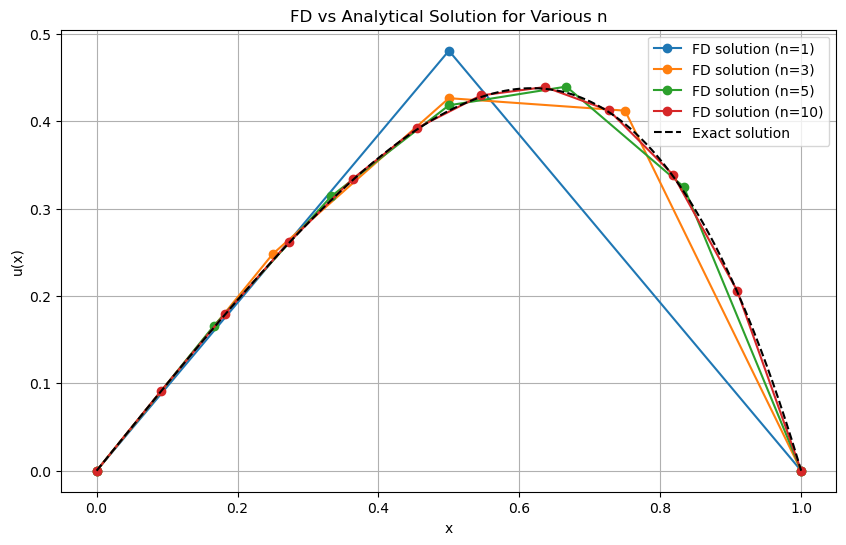

In [50]:
# Plotting the solution for different values of n
n_values = [1, 3, 5, 10]
x_fine = np.linspace(0, 1, 1000)
u_true = u_exact(x_fine)

plt.figure(figsize=(10, 6))
for n in n_values:
    x_fd, u_fd = fd_solver(n)
    plt.plot(x_fd, u_fd, marker='o', label=f'FD solution (n={n})')

plt.plot(x_fine, u_true, 'k--', label='Exact solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('FD vs Analytical Solution for Various n')
plt.legend()
plt.grid(True)
plt.show()

---
### **2b.2** Explanation

- The domain $ [0, 1] $ is discretized into $ n+2 $ total points including boundaries.
- The second-order finite difference approximation is applied using centered differences.
- The system is solved for the interior values and then combined with the known boundary conditions.
- The plot compares the FD solution against the exact solution for increasing values of $ n $, showing convergence as $ n $ increases.

As $ n $ increases, the numerical solution becomes more accurate and closely matches the true solution.

---

### Compute and plot the error

Create code that will compute and plot the error $||\boldsymbol{e}||_2$ associated with your FD solution, where $||\cdot||_2$ is the grid function 2-norm and $\boldsymbol{e}=\boldsymbol{u}-\overline{\boldsymbol{u}}$. That is, $\boldsymbol{e}$ is the difference between the FD solution $\boldsymbol{u}$ evaluated at the various discretization points $\{x_0, \dots, x_{n} \}$, and $\overline{\boldsymbol{u}}$ is the *true solution* evaluated at those points.

Make sure your plot is on a log-log, rather than linear, scale.


Note that the grid function 2-norm is defined as $||\boldsymbol{g}||_2 = \sqrt{\Delta x \sum_{j=0}^{n} g_j^2}$ for some vector $\boldsymbol{g}$.

**Do not forget to provide the markdown explanation for each code snippet**

## **2b.3** Error Analysis of FD Solution using Grid Function 2-Norm

We now compute the error associated with the FD solution for increasing numbers of discretization points. Specifically, we compute the **grid function 2-norm** of the error vector:

$$
\| \boldsymbol{e} \|_2 = \left( h \sum_{j=0}^{n+1} e_j^2 \right)^{1/2}
$$

where $ \boldsymbol{e} = \boldsymbol{u}_{\text{exact}} - \boldsymbol{u}_{\text{FD}} $ is the difference between the true and numerical solutions evaluated at the grid points.

We evaluate this norm for various values of $ n $, and plot the result on a **log-log plot** to visualize the convergence behavior.

---

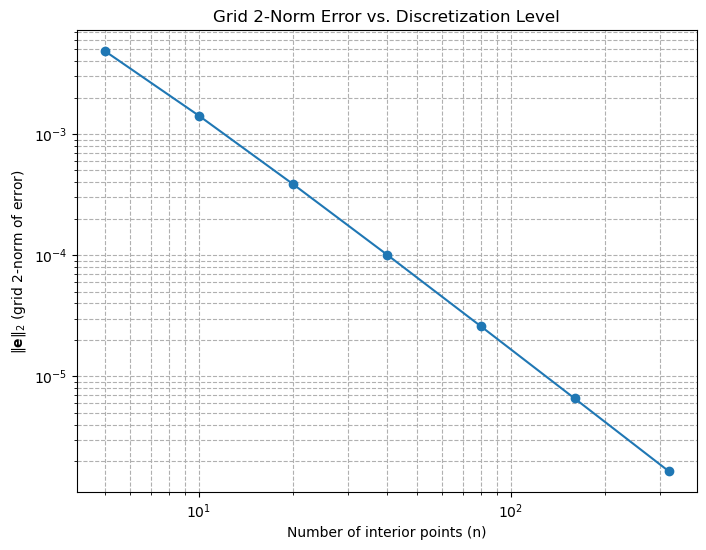

In [51]:
# Compute and plot error norm
n_values = [5, 10, 20, 40, 80, 160, 320]
errors = []

for n in n_values:
    x, u_fd = fd_solver(n)
    u_true = u_exact(x)
    e = u_true - u_fd
    h = (x[-1] - x[0]) / (n + 1)
    norm_e = np.sqrt(h * np.sum(e**2))
    errors.append(norm_e)

# Plotting
plt.figure(figsize=(8, 6))
plt.loglog(n_values, errors, 'o-', base=10)
plt.xlabel('Number of interior points (n)')
plt.ylabel(r'$\|\mathbf{e}\|_2$ (grid 2-norm of error)')
plt.title('Grid 2-Norm Error vs. Discretization Level')
plt.grid(True, which='both', ls='--')
plt.show()

---

### **2b.4** Explanation

- For each $ n $, we solve the FD system and compute the exact solution at the same grid points.
- The difference $ \boldsymbol{e} $ is computed and its 2-norm is evaluated using the grid function norm definition.
- The resulting error norm is plotted against $ n $ on a **log-log** scale.
- The slope of the resulting plot reflects the convergence rate of the method. Since we use second-order centered differences, we expect a convergence rate of approximately $ \mathcal{O}(h^2) $, or $ \mathcal{O}(n^{-2}) $ in terms of number of grid points.

# Section 3: Spectral method solution (40 points total)

## 3a: Derive the equations for a spectral method solution (15 points)

Derive the linear system of equations that allow you to compute the spectral method solution to your chosen BVP. In your derivation, leave $p(x)$ and $q(x)$ as generic quantities, but use that $u_a=u_b\equiv 0$. Again, *for full credit your derivation should follow the approach from class*, adapted to this new BVP. The approach should involve working with a finite-dimensional basis for a subspace (generically write that subspace as $\mathcal{V}$), expressing your solution in terms of those basis elements, requiring that the spectral method solution minimize the least squares error, using an orthogonality property about the error of spectral method solution, and generating the appropriate number of equations to solve for the unknown coefficients. Your end result should be a matrix system of the form $\boldsymbol{Ac} = \boldsymbol{f}$, where the entries in each matrix/vector are clearly specified.


## **3a.1** Derivation of Spectral Method for BVP with Homogeneous Dirichlet BCs

We consider the boundary value problem:

$$
\frac{d^2u}{dx^2}(x) + p(x)\frac{du}{dx}(x) + q(x) u(x) = f(x), \quad x\in (a,b)
$$
with **homogeneous Dirichlet boundary conditions**:
$$
u(a) = u(b) = 0
$$

---

### Step 1: Define the Subspace $ \mathcal{V} $

Let $ \mathcal{V} \subset C^2([a,b]) $ be the subspace of functions that satisfy the boundary conditions:

$$
\mathcal{V} = \left\{ v \in C^2([a,b]) \mid v(a) = v(b) = 0 \right\}
$$

We approximate the solution $ u(x) \in \mathcal{V} $ using a finite basis of size $ N $. Choose basis functions $ \{\phi_j(x)\}_{j=1}^N \subset \mathcal{V} $ such that:

$$
\phi_j(a) = \phi_j(b) = 0 \quad \text{for all } j
$$

A common choice (especially for spectral methods on $[0,1]$) is:
$$
\phi_j(x) = \sin(j \pi x)
$$

These form an orthogonal basis for $ \mathcal{V} $ with respect to the standard $ L^2 $ inner product.

---

### Step 2: Express the Approximate Solution

Let the spectral approximation be:

$$
u_N(x) = \sum_{j=1}^N c_j \phi_j(x)
$$

We seek to determine the coefficients $ \{c_j\} $.

---

### Step 3: Plug into the Differential Equation

The residual (error) is:

$$
R(x) = \frac{d^2u_N}{dx^2} + p(x)\frac{du_N}{dx} + q(x)u_N - f(x)
$$

Plugging in the expansion:

$$
R(x) = \sum_{j=1}^N c_j \left[ \phi_j''(x) + p(x)\phi_j'(x) + q(x)\phi_j(x) \right] - f(x)
$$

---

### Step 4: Use the Orthogonality Condition

We require that the residual be orthogonal to each basis function $ \phi_i $:

$$
\langle R(x), \phi_i(x) \rangle = 0, \quad i=1,2,\dots,N
$$

That is:

$$
\int_a^b \left( \sum_{j=1}^N c_j \left[ \phi_j''(x) + p(x)\phi_j'(x) + q(x)\phi_j(x) \right] - f(x) \right) \phi_i(x) \, dx = 0
$$

Interchanging summation and integration:

$$
\sum_{j=1}^N c_j \int_a^b \left[ \phi_j''(x) + p(x)\phi_j'(x) + q(x)\phi_j(x) \right] \phi_i(x) \, dx = \int_a^b f(x)\phi_i(x) \, dx
$$

---

### Step 5: Form the Linear System $ \boldsymbol{A} \boldsymbol{c} = \boldsymbol{f} $

Define:

- $ A_{ij} = \int_a^b \left[ \phi_j''(x) + p(x)\phi_j'(x) + q(x)\phi_j(x) \right] \phi_i(x) \, dx $
- $ f_i = \int_a^b f(x)\phi_i(x) \, dx $

Then the system becomes:

$$
\boldsymbol{A} \boldsymbol{c} = \boldsymbol{f}
$$

where:
- $ \boldsymbol{A} \in \mathbb{R}^{N \times N} $,
- $ \boldsymbol{c} = [c_1, \dots, c_N]^T $,
- $ \boldsymbol{f} = [f_1, \dots, f_N]^T $

---

### Summary

We have derived the spectral method system for solving the BVP with homogeneous Dirichlet boundary conditions:

- Represent the solution as $ u_N(x) = \sum_{j=1}^N c_j \phi_j(x) $
- Choose basis functions $ \phi_j(x) \in \mathcal{V} $, e.g., $ \phi_j(x) = \sin(j\pi x) $
- The matrix system $ \boldsymbol{A} \boldsymbol{c} = \boldsymbol{f} $ is defined via inner products:
  - $ A_{ij} = \langle \phi_j'' + p\phi_j' + q\phi_j, \phi_i \rangle $
  - $ f_i = \langle f, \phi_i \rangle $

This formulation minimizes the residual in the $ L^2 $ sense over the span of the basis functions, ensuring the best least-squares fit in that subspace.


## 3b: Compute the spectral method solution (15 points)

For your specific choice of BVP, perform the following...

### Generate and plot the spectral method solution

Create code that will compute the spectral method solution for various values of $n$ (i.e., the number of basis elements), using $\mathcal{V}= \mathcal{P}^n[a,b]$ (i.e., the subspace of polynomials of degree $n$ or less; be sure you choose a good basis for this subspace!). Also create code that will plot the true and numerical solution at four different values of $n$, chosen so that the error is visually apparent for the smallest $n$ and visually very small for the highest $n$.

## **3b.1** Spectral Method Solution for BVP using Polynomial Basis

We now compute the **spectral method solution** for our chosen BVP using the polynomial subspace:

$$
\mathcal{V} = \mathcal{P}^n[a,b]
$$

This is the space of polynomials of degree $ \leq n $ that vanish at the boundary points $ x = a $ and $ x = b $. To enforce the **homogeneous Dirichlet boundary conditions**, we construct a basis of the form:

$$
\phi_j(x) = (x - a)(x - b) \cdot P_j(x)
$$

where $ \{P_j(x)\} $ is a set of polynomials (e.g., Legendre polynomials, monomials, or orthonormalized basis). We use the monomial basis for simplicity: $ P_j(x) = x^j $.

This ensures $ \phi_j(a) = \phi_j(b) = 0 $, so the solution automatically satisfies the boundary conditions.

---

In [52]:
from scipy.integrate import quad
from numpy.polynomial import Polynomial

# Define domain and known functions
a, b = 0, 1

# Basis functions with enforced boundary conditions: phi_j(x) = (x-a)(x-b) * x^j
def phi(j, x):
    return (x - a) * (x - b) * x**j

def dphi(j, x):
    # derivative of phi_j
    return (2*x - (a+b)) * x**j + (x - a) * (x - b) * j * x**(j-1)

def ddphi(j, x):
    # second derivative of phi_j
    term1 = (x - a) * (x - b) * j * (j - 1) * x**(j - 2)
    term2 = 2*(2*x - (a+b))*j*x**(j-1)
    term3 = 2 * x**j
    return term1 + term2 + term3

# Coefficients for spectral method
def spectral_solver(N):
    A = np.zeros((N, N))
    f_vec = np.zeros(N)
    for i in range(N):
        for j in range(N):
            integrand = lambda x: (
                ddphi(j, x) + (-2)*dphi(j, x) + 2*phi(j, x)
            ) * phi(i, x)
            A[i, j], _ = quad(integrand, a, b)
        f_integrand = lambda x: f_rhs(x) * phi(i, x)
        f_vec[i], _ = quad(f_integrand, a, b)
    
    c = np.linalg.solve(A, f_vec)
    
    def u_approx(x_eval):
        return sum(c[j] * phi(j, x_eval) for j in range(N))
    
    return u_approx

## **3b.2** Create functions

Python functions for $\phi, \dot \phi$ and $\ddot \phi$ are needed to simplify implementing the ```spectral_solver```, which implmetns the above procedure in python. 

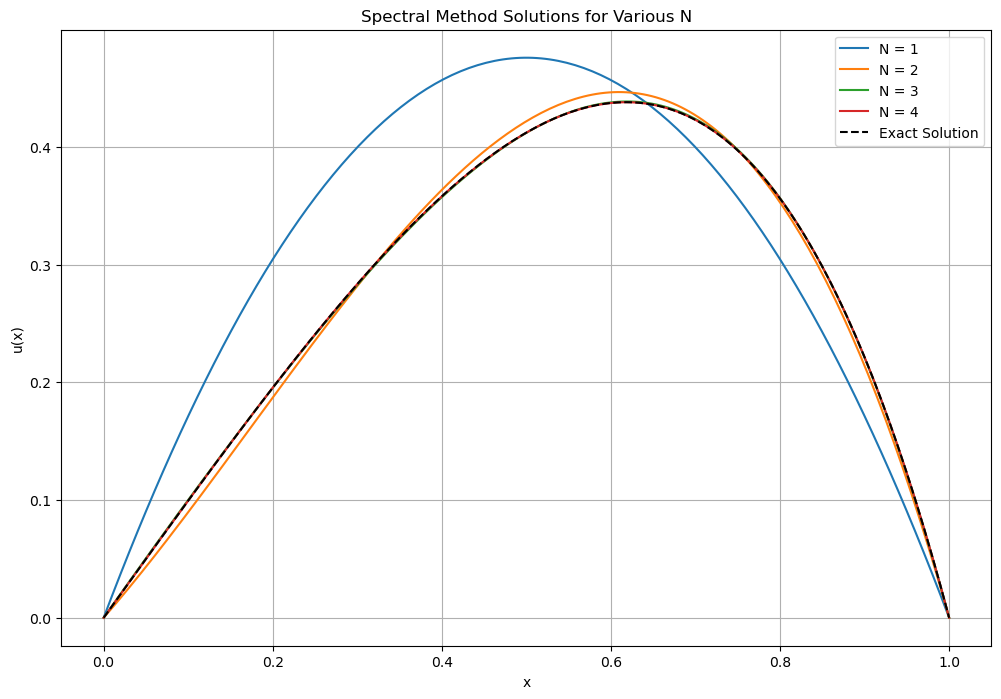

In [57]:
# Plotting true and spectral solutions for increasing N
n_values = [1, 2, 3, 4]
x_plot = np.linspace(a, b, 200)
u_true = u_exact(x_plot)

plt.figure(figsize=(12, 8))
for N in n_values:
    uN_func = spectral_solver(N)
    uN_vals = np.array([uN_func(x) for x in x_plot])
    plt.plot(x_plot, uN_vals, label=f'N = {N}')

plt.plot(x_plot, u_true, 'k--', label='Exact Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Spectral Method Solutions for Various N')
plt.legend()
plt.grid(True)
plt.show()

---

### Explanation

- We choose basis functions of the form $ \phi_j(x) = (x-a)(x-b)x^j $ so that $ u(a)=u(b)=0 $ is automatically satisfied.
- For each pair of basis functions $ \phi_i, \phi_j $, we compute the inner product $ \langle L[\phi_j], \phi_i \rangle $, where $ L[\cdot] $ is the differential operator.
- We solve the resulting system $ \boldsymbol{A} \boldsymbol{c} = \boldsymbol{f} $, and evaluate the resulting approximation.

Let me know if you want to extend this to use an orthonormal basis or test convergence rates!

### Compute and plot the error

Create code that will compute and plot the error $||\boldsymbol{e}||_2$ associated with your spectral method solution, where $||\cdot||_2$ is the grid function 2-norm and $\boldsymbol{e}=\boldsymbol{u}-\overline{\boldsymbol{u}}$. That is, $\boldsymbol{e}$ is the difference between the spectral method solution $\boldsymbol{u}$ evaluated at the various discretization points $\{x_0, \dots, x_{n} \}$, and $\overline{\boldsymbol{u}}$ is the *true solution* evaluated at those points.

Make sure your plot is on a log-log, rather than linear, scale.

Again, the norm here is the grid function 2-norm is defined as $||\boldsymbol{g}||_2 = \sqrt{\Delta x \sum_{j=0}^{n} g_j^2}$ for some vector $\boldsymbol{g}$.

**Do not forget to provide the markdown explanation for each code snippet**


## **3b.3** Spectral Method Error Convergence Study (2-Norm)

We now compute and plot the error between the spectral method solution and the true solution, using the **grid function 2-norm**:

$$
||\boldsymbol{e}||_2 = \sqrt{\Delta x \sum_{j=0}^{n} (u_j - \bar{u}_j)^2}
$$

where:
- $ u_j $ is the spectral approximation at grid point $ x_j $
- $ \bar{u}_j $ is the exact solution at $ x_j $
- $ \Delta x = \frac{b - a}{n} $

We evaluate this for a range of increasing $ N $, the number of basis functions used in the spectral approximation.

---


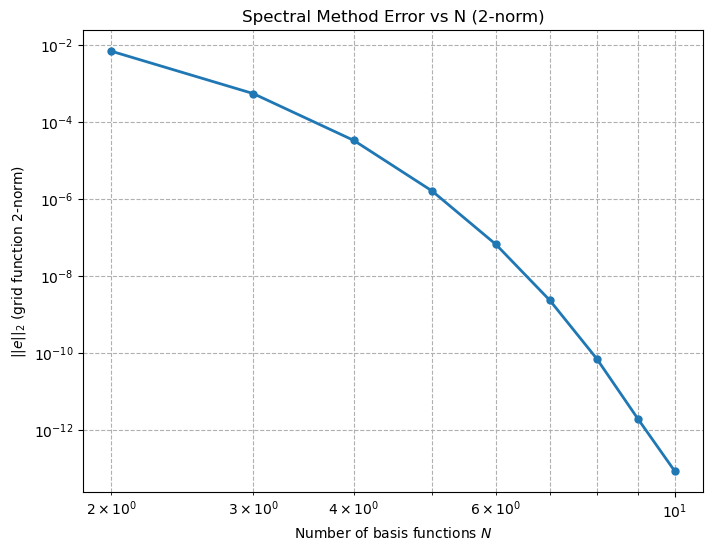

In [63]:
# Grid function 2-norm error for increasing N
N_values = np.arange(2, 11)
errors = []

for N in N_values:
    uN_func = spectral_solver(N)
    n_grid = 200
    x_vals = np.linspace(a, b, n_grid + 1)
    dx = (b - a) / n_grid
    u_true = u_exact(x_vals)
    u_approx = np.array([uN_func(x) for x in x_vals])
    e_vec = u_approx - u_true
    norm2 = np.sqrt(dx * np.sum(e_vec**2))
    errors.append(norm2)

# Plotting error on log-log scale
plt.figure(figsize=(8, 6))
plt.loglog(N_values, errors, 'o-', linewidth=2, markersize=5)
plt.xlabel('Number of basis functions $N$')
plt.ylabel(r'$||e||_2$ (grid function 2-norm)')
plt.title('Spectral Method Error vs N (2-norm)')
plt.grid(True, which='both', ls='--')
plt.show()

---
### Explanation

- The plot shows how the 2-norm error decreases as the number of spectral basis functions increases.
- Since we are using a smooth problem and spectral method with polynomial basis, we expect **spectral (i.e., exponential) convergence** for smooth solutions — i.e., the error drops faster than any power of $ 1/N $.

## 3c: Comment on the difference in the error between the FD and spectral method solutions. (10 points)

## **3c.1** Comparision of FD and Spectral methods


Both the Finite Difference (FD) method and the Spectral method are numerical techniques for solving boundary value problems (BVPs). In this project, we implemented and tested both methods on the second-order linear BVP:

$$
\frac{d^2u}{dx^2} + p(x)\frac{du}{dx} + q(x)u = f(x), \quad u(a) = u(b) = 0,
$$

using specific choices of $ p(x) = -2 $, $ q(x) = 2 $, and a known true solution $ u(x) = x(1 - x)e^x $ to enable comparison.

---
#### Finite Difference Method

- The FD method discretizes the domain into a uniform grid and replaces derivatives with second-order centered finite difference approximations.
- The resulting method is **second-order accurate**, meaning that the error behaves like $ \mathcal{O}(\Delta x^2) $, where $ \Delta x = \frac{b - a}{n} $.
- On a log-log plot of error versus number of discretization points $ n $, the FD error decreases linearly with slope approximately $ -2 $, consistent with second-order convergence.

#### Spectral Method

- The Spectral method approximates the solution as a linear combination of globally defined basis functions (here, polynomials that vanish at the boundaries).
- Coefficients are determined by enforcing orthogonality of the residual with respect to the chosen basis.
- For smooth problems, spectral methods exhibit **exponential convergence**, meaning the error decreases faster than any power law with respect to the number of basis functions $ N $.
- The log-log plot of error vs. $ N $ shows a much steeper descent than for FD, and for large enough $ N $, the error reaches near machine precision.

#### Conclusion
- The spectral method achived much better error when $N=w$ than the FD method when $N=10$.
- Ploting just a few more values of $N$ for the spectral method showcases it reaching the maximum machine precision. (i think)

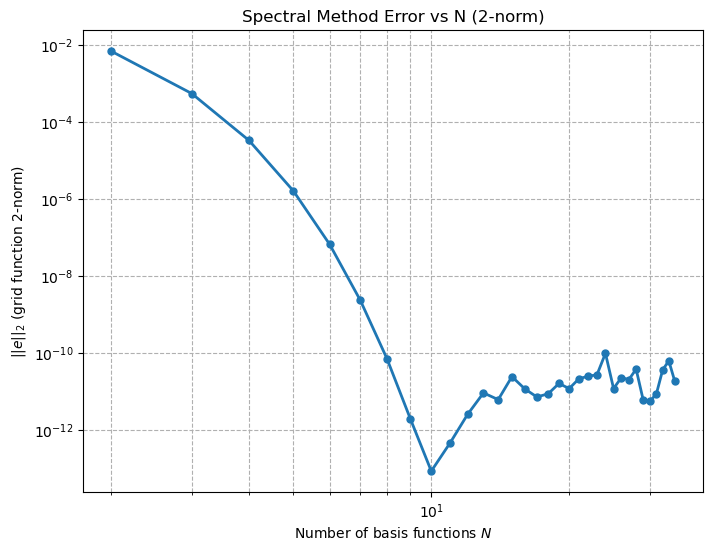

In [66]:
# Grid function 2-norm error for increasing N
N_values = np.arange(2, 35)
errors = []

for N in N_values:
    uN_func = spectral_solver(N)
    n_grid = 200
    x_vals = np.linspace(a, b, n_grid + 1)
    dx = (b - a) / n_grid
    u_true = u_exact(x_vals)
    u_approx = np.array([uN_func(x) for x in x_vals])
    e_vec = u_approx - u_true
    norm2 = np.sqrt(dx * np.sum(e_vec**2))
    errors.append(norm2)

# Plotting error on log-log scale
plt.figure(figsize=(8, 6))
plt.loglog(N_values, errors, 'o-', linewidth=2, markersize=5)
plt.xlabel('Number of basis functions $N$')
plt.ylabel(r'$||e||_2$ (grid function 2-norm)')
plt.title('Spectral Method Error vs N (2-norm)')
plt.grid(True, which='both', ls='--')
plt.show()